# 3.8 Assignment 3: Logistic Regression and K-Nearest Neighbor (KNN)

[Problem 1](#Problem-1)

[Problem 2](#Problem-2) 

### Libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statistics import mean

from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

# Problem 1

An automated answer-rating site marks each post in a community forum website as “good” or “bad” based on the quality of the post. The following lists the type of qualities that the dataset contains:


num_words:	number of words in the post

num_characters:	number of characters in the post

num_misspelled:	number of misspelled words

bin_end_qmark:	if the post ends with a question mark

num_interrogative:	number of interrogative words in the post

bin_start_small:	if the answer starts with a lowercase letter ("1" means yes, otherwise no)

num_sentences:	number of sentences per post

num_punctuations:	number of punctuation symbols in the post

label: the label of the post:	("G" for good and "B" for bad) as determined by the tool


1. Create a logistic regression model to predict the class label from the first eight attributes of the question set.
2. Try doing the same using two different subsets (your choice) of those eight attributes.

3. Report the accuracies of each of these three models.
4. For the two subsets that you use, provide some justification (why you chose those features in a given subset).

As discussed, it is useful to report not just a single accuracy number for a given model, but either an average accuracy over many runs or a distribution of accuracies over those runs.

In [4]:
#load data
post_data = pd.read_csv('Problem 1—quality.csv')
post_data.head()

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label
0,1,10,48,2,0,0,0,2,4,B
1,2,8,25,0,0,0,1,1,0,B
2,3,20,81,0,1,19,0,1,1,B
3,4,9,34,1,0,1,0,1,2,B
4,5,18,69,3,0,1,0,1,0,B


In [5]:
#check for null values
post_data.isnull().any()

S.No.                False
num_words            False
num_characters       False
num_misspelled       False
bin_end_qmark        False
num_interrogative    False
bin_start_small      False
num_sentences        False
num_punctuations     False
label                False
dtype: bool

In [7]:
#make quick examination
post_data.describe()

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,257.500000,26.285714,120.500000,3.035714,0.142857,1.392857,0.142857,2.571429,5.392857
std,254.620633,34.332640,162.859744,5.620611,0.356348,3.520725,0.356348,2.936722,9.897023
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,7.750000,9.000000,43.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,257.500000,13.500000,62.500000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,507.250000,26.500000,119.500000,4.000000,0.000000,1.000000,0.000000,2.000000,6.250000
max,514.000000,169.000000,831.000000,26.000000,1.000000,19.000000,1.000000,13.000000,48.000000


In [11]:
post_data.dtypes

S.No.                 int64
num_words             int64
num_characters        int64
num_misspelled        int64
bin_end_qmark         int64
num_interrogative     int64
bin_start_small       int64
num_sentences         int64
num_punctuations      int64
label                object
dtype: object

In [12]:
post_data.shape

(28, 10)

In [13]:
post_data['label'].unique()

array(['B', 'G'], dtype=object)

In [15]:
#convert 'g' to 1 and 'b' to 0 to indicate good posts as 1 and bad as 0
post_data['binary_label'] = (post_data['label'] == 'G').astype(int)
post_data.head()

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label,binary_label
0,1,10,48,2,0,0,0,2,4,B,0
1,2,8,25,0,0,0,1,1,0,B,0
2,3,20,81,0,1,19,0,1,1,B,0
3,4,9,34,1,0,1,0,1,2,B,0
4,5,18,69,3,0,1,0,1,0,B,0


In [16]:
post_data.tail()

,S.No.,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,label,binary_label
23,510,17,93,1,0,1,0,1,0,G,1
24,511,76,329,3,0,3,0,8,9,G,1
25,512,13,44,0,0,1,0,1,0,G,1
26,513,10,35,0,0,1,0,1,0,G,1
27,514,52,201,1,0,1,0,1,0,G,1


In [25]:
post_data['binary_label'].value_counts()

0    14
1    14
Name: binary_label, dtype: int64

In [26]:
post_data['label'].value_counts()

B    14
G    14
Name: label, dtype: int64

In [192]:
#inspect correlation values
data_corr = post_data.copy()
data_corr = data_corr.drop(columns=['S.No.', 'constant'])
correlation = data_corr.corr(numeric_only = True)

correlation

,num_words,num_characters,num_misspelled,bin_end_qmark,num_interrogative,bin_start_small,num_sentences,num_punctuations,binary_label
num_words,1.000000,0.991933,0.504916,-0.103360,0.034886,-0.157852,0.923278,0.885496,0.408902
num_characters,0.991933,1.000000,0.555957,-0.123808,0.013597,-0.141039,0.926325,0.908482,0.366690
num_misspelled,0.504916,0.555957,1.000000,-0.224543,-0.118648,0.367193,0.505823,0.562345,-0.071178
bin_end_qmark,-0.103360,-0.123808,-0.224543,1.000000,0.455465,-0.166667,-0.187069,-0.174027,-0.204124
num_interrogative,0.034886,0.013597,-0.118648,0.455465,1.000000,-0.075911,-0.029681,-0.061991,-0.113632
bin_start_small,-0.157852,-0.141039,0.367193,-0.166667,-0.075911,1.000000,-0.116286,-0.132021,-0.204124
num_sentences,0.923278,0.926325,0.505823,-0.187069,-0.029681,-0.116286,1.000000,0.894189,0.371533
num_punctuations,0.885496,0.908482,0.562345,-0.174027,-0.061991,-0.132021,0.894189,1.000000,0.216814
binary_label,0.408902,0.366690,-0.071178,-0.204124,-0.113632,-0.204124,0.371533,0.216814,1.000000


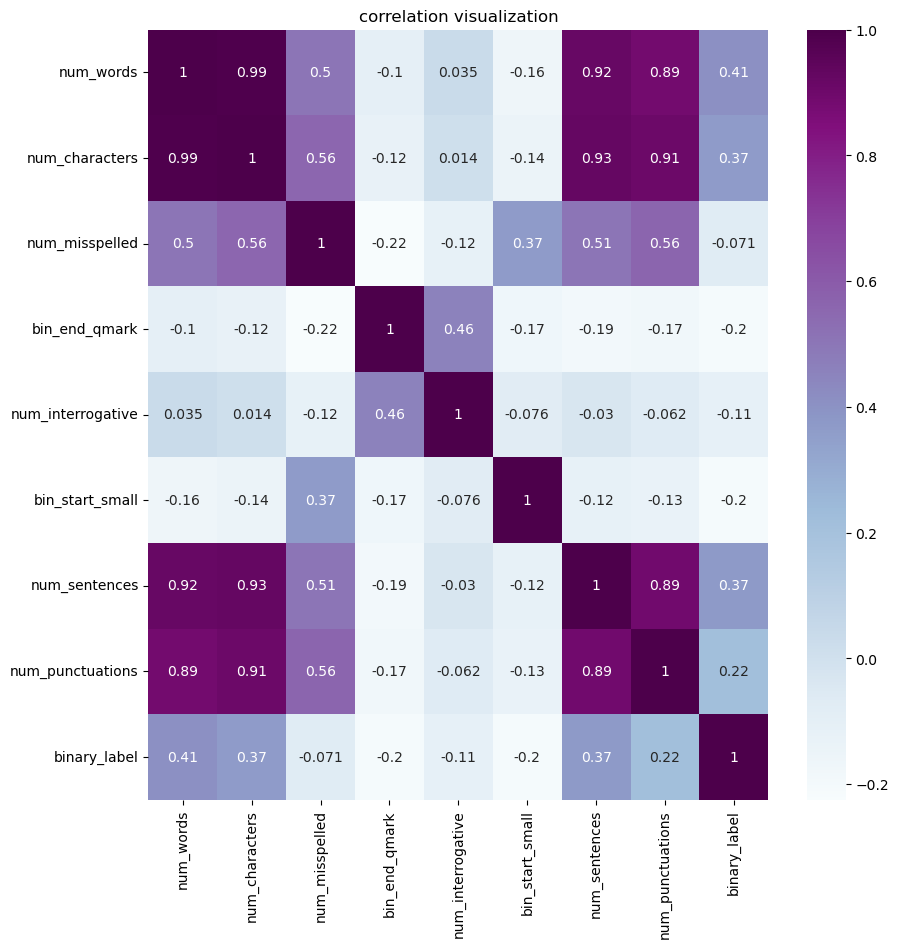

In [119]:
#visualize correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cmap = 'BuPu', annot = True)
plt.title('correlation visualization')
plt.show()

In [142]:
#set continuous variables to loop through
cont_var = ['num_words', 'num_characters', 'num_misspelled', 'num_interrogative', 'num_sentences', 'num_punctuations']

#initialize list to store corr_coef and p-values
corr_pvalue_results = []

#loop through variables and perform corr test
for variable in cont_var:
    correlation_coefficient, p_value = pearsonr(post_data[variable], post_data['binary_label'])
    
    corr_pvalue_results.append({'variable': variable, 'correlation_coefficient': correlation_coefficient, 'p_value': p_value})

#turn list to df
results_df = pd.DataFrame(corr_pvalue_results)
    
print('Results for continuous variables: \n', results_df)

print('Most significant variable(s): \n', results_df.loc[results_df['p_value'] <= .05])

Results for continuous variables: 
             variable  correlation_coefficient   p_value
0          num_words                 0.408902  0.030733
1     num_characters                 0.366690  0.054942
2     num_misspelled                -0.071178  0.718903
3  num_interrogative                -0.113632  0.564792
4      num_sentences                 0.371533  0.051576
5   num_punctuations                 0.216814  0.267771
Most significant variable(s): 
     variable  correlation_coefficient   p_value
0  num_words                 0.408902  0.030733


In [141]:
#chi-test
#set categorical values to loop through
cat_var = ['bin_end_qmark', 'bin_start_small']

#initialize list to store t-test and p-values
chi_results = []

#loop through variables and perform chi test
for variable in cat_var:
    chi2_stat, p_value, dof, expected = chi2_contingency(pd.crosstab(post_data[variable], post_data['binary_label']))
    
    chi_results.append({'variable': variable, 'chi2': chi2_stat, 'p_value': p_value, 'dof': dof, 'expected': expected})

#turn list to df
chi_results_df = pd.DataFrame(chi_results)
    
print('Results for categorical variables: \n', chi_results_df)

Results for categorical variables: 
           variable      chi2   p_value  dof                    expected
0    bin_end_qmark  0.291667  0.589154    1  [[12.0, 12.0], [2.0, 2.0]]
1  bin_start_small  0.291667  0.589154    1  [[12.0, 12.0], [2.0, 2.0]]


In [115]:
#gather column names for feature selection
post_data.columns

Index(['S.No.', 'num_words', 'num_characters', 'num_misspelled',
       'bin_end_qmark', 'num_interrogative', 'bin_start_small',
       'num_sentences', 'num_punctuations', 'label', 'binary_label',
       'constant'],
      dtype='object')

### Logistic Regression Models with all 8 attributes (3 iterations)

In [197]:
#add a constant
post_data['constant'] = 1

#feature selection
X = post_data[['constant', 'num_words', 'num_characters', 'num_misspelled', 'bin_end_qmark', 
               'num_interrogative', 'bin_start_small', 'num_sentences', 'num_punctuations']]

y = post_data['binary_label']

#set list of test_size and random_seed
test_sizes = [0.2, 0.3, 0.5]
random_states = [11, 27, 30]

#create list for accuracy score
accuracy_scores_all_attributes = []

#loop through test_sizes, random_states
for test_size, random_state in zip(test_sizes, random_states):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_probabilities = logreg.predict(X_test)
    accuracy_scores_all_attributes.append(accuracy_score(y_test, y_probabilities))

#calculate avg accuracy score
avg_accuracy_all_attributes = round(sum(accuracy_scores_all_attributes) / len(accuracy_scores_all_attributes),2)
avg_accuracy_all_attributes

/Users/anasantiago/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anasantiago/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

0.62

## Models w/2 variables of my choosing

Based on the previous t-test and chi-squared tests I calculated, I concluded the following:

It seems the only variable that has statistical significance from the set of attributes is num_words, so my first model with 2 variables will include this column as well as num_sentences, since that is the second variable that has a p-value around 0.05.

My second model will feature num_interrogative and num_charatcers since num_characters has a slightly bigger p-value but is still very close to .05, as is num_interrogative. 

I decided to not use either of the categorical variables because their chi2 statistic is relatively small, and their p-values are bigger than .05, so I can't reject the null hypothesis of these variables not having statistical significance/association with the label. 

### Logreg subset 1 with variables: 'num_sentences', 'num_words'

In [139]:
#feature selection
X1 = post_data[['constant','num_sentences', 'num_words']]

y1 = post_data['binary_label']

#setting list of test_size and random_seed
test_sizes = [0.2, 0.3, 0.5]
random_states = [11, 27, 30]

#create list for accuracy score
accuracy_scores_sent_punct = []

#loop through test_sizes, random_states
for test_size, random_state in zip(test_sizes, random_states):
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = test_size, random_state = random_state)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_probabilities = logreg.predict(X_test)
    accuracy_scores_sent_punct.append(accuracy_score(y_test, y_probabilities))

#calculate avg accuracy score
avg_accuracy_sent_punct = round(sum(accuracy_scores_sent_punct) / len(accuracy_scores_sent_punct),2)
avg_accuracy_sent_punct

0.62

### Logreg subset 2 with variables: 'num_interrogative', 'num_characters'

In [140]:
#feature selection
X2 = post_data[['constant','num_interrogative', 'num_characters']]

y2 = post_data['binary_label']

#setting list of test_size and random_seed
test_sizes = [0.2, 0.3, 0.5]
random_states = [11, 27, 30]

#create list for accuracy score
accuracy_scores_words_char = []

#loop through test_sizes, random_states
for test_size, random_state in zip(test_sizes, random_states):
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = test_size, random_state = random_state)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_probabilities = logreg.predict(X_test)
    accuracy_scores_words_char.append(accuracy_score(y_test, y_probabilities))

#calculate avg accuracy score
avg_accuracy_words_char = round(sum(accuracy_scores_words_char) / len(accuracy_scores_words_char),2)
avg_accuracy_words_char

0.54

### Average model accuracy scores:

In [147]:
#print all 3 models' accuracy scores:
print('Average accuracy for models with all 8 attributes:', avg_accuracy_all_attributes)
print('Model with num_sentences, and num_words:', avg_accuracy_sent_punct)
print('Model with num_interrogative, and num_characters:', avg_accuracy_words_char)

Average accuracy for models with all 8 attributes: 0.62
Model with num_sentences, and num_words: 0.62
Model with num_interrogative, and num_characters: 0.54


# Problem 2
First, do some experiments (trial-and-error) to figure out a good subset of features to use for learning wine quality (last column). Report these features.

Then, use 70% data for training to build a kNN classifier with different values of k ranging from 2–10.

Plot your accuracies with each of these. In other words, your final result will be a line chart with k on the x-axis and accuracy on the y-axis

In [148]:
wine_data = pd.read_csv('Problem 2—wine dataset.csv')

In [149]:
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [159]:
#check for missing data -none missing
#wine_data.isnull().any()

In [158]:
#check data types -everything is float/int type
#wine_data.dtypes

In [152]:
wine_data['color'].unique()

array(['red', 'white'], dtype=object)

In [153]:
#ensure column is binary to indicate color
wine_data['is_red'].unique()

array([1., 0.])

In [155]:
#ensure high_quality values are binary
wine_data['high_quality'].unique()

array([0., 1.])

In [156]:
wine_data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'is_red',
       'high_quality'],
      dtype='object')

In [157]:
#drop 'color' column since values are captured by 'is_red'
wine_quality_df = wine_data.copy()
wine_quality_df = wine_quality_df.drop(columns = ['color'])
wine_quality_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'is_red', 'high_quality'],
      dtype='object')

In [161]:
wine_quality_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [174]:
#inspect quality column
wine_quality_df['quality'].unique()

#decided to remove this column from my analysis -although values are different, including this column
#would likely cause issues with the model

array([5, 6, 7, 4, 8, 3, 9])

In [175]:
#set continuous and categorical variables for testing
wine_cont_var = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

wine_cat_var = ['is_red']

In [176]:
#initialize list to store corr_coef and p-values on cont variables
wine_corr_pvalue_results = []

#loop through variables and perform corr test
for variable in wine_cont_var:
    correlation_coefficient, p_value = pearsonr(wine_quality_df[variable], wine_quality_df['high_quality'])
    
    wine_corr_pvalue_results.append({'variable': variable, 'correlation_coefficient': correlation_coefficient, 'p_value': p_value})

#turn list to df
wine_results_df = pd.DataFrame(wine_corr_pvalue_results)



#perform chi test for categorical variable

#initialize list to store t-test and p-values
wine_chi_results = []

#loop through variables and perform chi test
for variable in wine_cat_var:
    chi2_stat, p_value, dof, expected = chi2_contingency(pd.crosstab(wine_quality_df[variable], wine_quality_df['high_quality']))
    
    wine_chi_results.append({'variable': variable, 'chi2': chi2_stat, 'p_value': p_value, 'dof': dof, 'expected': expected})

#turn list to df
wine_chi_results_df = pd.DataFrame(wine_chi_results)

    
#print('Results for continuous variables: \n', wine_results_df)
#print('Most significant continuous variable(s): \n', wine_results_df.loc[wine_results_df['p_value'] <= .05])
print('Most significant continuous variable(s): \n', wine_results_df['variable'].loc[wine_results_df['p_value'] <= .05])

print('Results for categorical variables: \n', wine_chi_results_df)

Most significant continuous variable(s): 
 0            fixed_acidity
1         volatile_acidity
2              citric_acid
3           residual_sugar
4                chlorides
6     total_sulfur_dioxide
7                  density
8                       pH
9                sulphates
10                 alcohol
Name: variable, dtype: object
Results for categorical variables: 
   variable       chi2       p_value  dof  \
0   is_red  49.208997  2.300930e-12    1   

                                            expected  
0  [[3935.2870555641066, 962.7129444358935], [128...  


In [173]:
wine_quality_df.shape

(6497, 14)

A good subset of features based on their p-values from the testing above to use for learning about wine quality would be: fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, total_sulfur_dioxide, density, pH, sulphates, alcohol, and is_red. 

In [189]:
from sklearn.neighbors import KNeighborsClassifier

#feature selection
X = wine_quality_df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 
               'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'is_red']]

y = wine_quality_df['high_quality']

#setting list of different k-values
#test_sizes = [0.2, 0.3, 0.5]
k_values = list(range(2,11))

#create list for accuracy score
knn_accuracy = []

#loop through test_sizes, random_states
for k in k_values:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 53)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    y_preds = knn.predict(X_test)
    
    accuracy = round((y_preds == y_test).mean(),2)
    
    knn_accuracy.append((k, accuracy))
    
#store accuracies in df
knn_accuracy_df = pd.DataFrame(knn_accuracy, columns = ['k', 'model_accuracy'])
print(knn_accuracy_df)

    k  model_accuracy
0   2            0.82
1   3            0.80
2   4            0.82
3   5            0.81
4   6            0.81
5   7            0.80
6   8            0.81
7   9            0.81
8  10            0.81


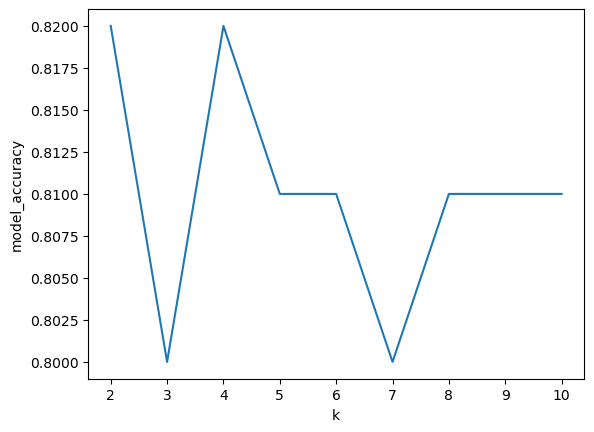

In [191]:
sns.lineplot(data = knn_accuracy_df, x = 'k', y = 'model_accuracy')
plt.show()

Overall, the accuracy scores seem to have remained within close range across the different k values used. It seems the sweet spot for this dataset is to use 2 or 4 as the number of neighbors to obtain maximum accuracy. 